In [23]:
import pandas as pd
df = pd.read_csv('Data/OUTPUT_cleandata/df_dist.csv').drop(columns='Unnamed: 0')
df.head()

,units_residential,units_commercial,year_sold,years_elapsed,log_saleprice,latitude,longitude,yearalter1,numbldgs,numfloors,...,dist_park,dist_subway,dist_hospital,dist_school,dist_housingdev,dist_college,dist_museum,CPI,GDPpcc,HPI
0,11.0,0.0,2017,117.0,15.137266,40.722732,-73.977946,2017.0,1.0,5.0,...,0.000879,0.009050,0.007082,0.001207,0.000187,0.014467,0.007724,267.948,59907.75426,200.77
1,24.0,1.0,2017,107.0,15.470877,40.721552,-73.981031,NaN,2.0,5.0,...,0.000644,0.007157,0.005513,0.002245,0.001172,0.012473,0.004429,268.051,59907.75426,206.33
2,5.0,0.0,2017,117.0,15.706361,40.726569,-73.979857,1984.0,1.0,4.0,...,0.000317,0.004768,0.010503,0.001740,0.000568,0.010361,0.008657,268.051,59907.75426,206.33
3,11.0,1.0,2017,117.0,15.853479,40.724240,-73.984223,NaN,1.0,6.0,...,0.001198,0.005776,0.009023,0.001944,0.001361,0.008364,0.004690,269.381,59907.75426,205.34
4,0.0,0.0,2017,97.0,13.120361,40.720893,-73.978423,1981.0,1.0,6.0,...,0.000262,0.009351,0.005194,0.001071,0.000323,0.015058,0.006714,267.582,59907.75426,198.56


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
units_residential,34762.0,3.603159,22.365354,0.000000,0.000000,1.000000,1.000000,899.000000
units_commercial,25951.0,0.782051,8.905739,0.000000,0.000000,0.000000,0.000000,570.000000
year_sold,62137.0,2019.854708,1.792338,2017.000000,2018.000000,2020.000000,2021.000000,2022.000000
years_elapsed,59692.0,98.353598,234.641516,0.000000,54.000000,80.000000,100.000000,2018.000000
log_saleprice,62137.0,14.038757,1.487696,0.693147,13.345507,13.952730,14.731801,21.597693
latitude,62137.0,40.763037,0.033522,40.702776,40.737678,40.763190,40.780596,40.878084
longitude,62137.0,-73.976283,0.021194,-74.018118,-73.993629,-73.978224,-73.959475,-73.909048
yearalter1,31033.0,1991.630458,13.997397,987.000000,1985.000000,1987.000000,1999.000000,2021.000000
numbldgs,59959.0,1.349339,2.144255,0.000000,1.000000,1.000000,1.000000,39.000000
numfloors,59280.0,16.190418,12.555822,1.000000,6.000000,14.000000,20.000000,98.000000


# Models

### Sort chronologically, train test split

In [3]:
#train test split

#sort values by date
df = df.sort_values('year_sold')

# drop sale price

#subset into X and y
X = df.drop('log_saleprice', axis=1)
y = df['log_saleprice']

#split into train test split
train_size = round(len(df)*0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(49710, 24)
(49710,)
(12427, 24)
(12427,)


## Run models

### RF preprocessor, full model

In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

numeric_features_full = X_train.select_dtypes([np.number]).columns.tolist()
categorical_features_full = X_train.select_dtypes([object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor_full_rf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_full),
        ('cat', categorical_transformer, categorical_features_full)])

preprocess_full_rf = preprocessor_full_rf.fit(X_train) 

def preprocessor_full_rf(data):
    preprocessed_data = preprocess_full_rf.transform(data)
    return preprocessed_data

#### RF, full model

In [5]:
## Random Forest for feat. selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {'max_depth': [10, 30, 50],
              'n_estimators': [10, 30, 50]}

grid = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, scoring='r2', cv=10)

grid.fit(preprocessor_full_rf(X_train), y_train)

print("best median cross-val score: {}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(preprocessor_full_rf(X_test), y_test)))

best median cross-val score: 0.20351988580197505
best parameters: {'max_depth': 10, 'n_estimators': 50}
test-set score: 0.1818961736330006


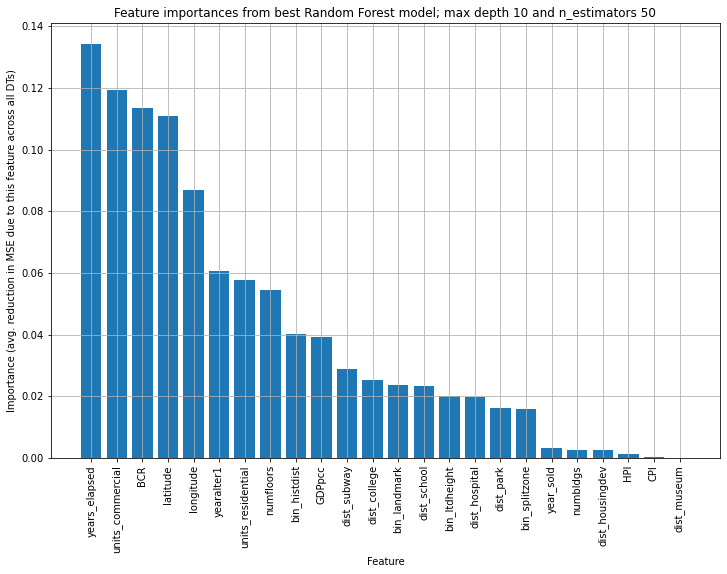

In [6]:
import matplotlib.pyplot as plt
best_forest = RandomForestRegressor(max_depth = grid.best_params_['max_depth'], n_estimators=grid.best_params_['n_estimators']).fit(preprocessor_full_rf(X_train), y_train)

forest_1_predictions = best_forest.predict(preprocessor_full_rf(X_test))

feature_names = X_train.columns
forest_importances = pd.DataFrame(best_forest.feature_importances_, index=feature_names).sort_values([0], ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(forest_importances.index, forest_importances[0])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance (avg. reduction in MSE due to this feature across all DTs)')
plt.title('Feature importances from best Random Forest model; max depth {} and n_estimators {}'.format(
    grid.best_params_['max_depth'], grid.best_params_['n_estimators']))
plt.grid()
plt.savefig('Models/featureimportances.png')
plt.show()

In [7]:
most_imp_cols = forest_importances.index[:10]

X_train_imp = X_train[most_imp_cols]
X_test_imp = X_test[most_imp_cols]

### RF preprocessor, subset

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features_sub = X_train_imp.select_dtypes([np.number]).columns.tolist()
categorical_features_sub = X_train_imp.select_dtypes([object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

preprocessor_sub_rf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_sub),
        ('cat', categorical_transformer, categorical_features_sub)])

preprocess_sub_rf = preprocessor_sub_rf.fit(X_train_imp) 

def preprocessor_sub_rf(data):
    preprocessed_data = preprocess_sub_rf.transform(data)
    return preprocessed_data

#### RF, subset

In [9]:
param_grid = {'max_depth': [10, 30, 50],
              'n_estimators': [10, 30, 50]}

grid = GridSearchCV(RandomForestRegressor(), param_grid = param_grid, scoring='r2', cv=10)

grid.fit(preprocessor_sub_rf(X_train_imp), y_train)

print("best median cross-val score: {}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {}".format(grid.score(preprocessor_sub_rf(X_test), y_test)))

forest_2_predictions = grid.predict(preprocessor_sub_rf(X_test_imp))

best median cross-val score: 0.21663724329951733
best parameters: {'max_depth': 10, 'n_estimators': 50}
test-set score: 0.22614424339310923


### OLS preprocessor, full model

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
import numpy as np

numeric_features_full = X_train.select_dtypes([np.number]).columns.tolist()

categorical_features_full = X_train.select_dtypes([object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor_full_ols = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_full),
        ('cat', categorical_transformer, categorical_features_full)])

preprocessor_full_lr = preprocessor_full_ols.fit(X_train) 

def preprocessor_full_ols(data):
    preprocessed_data = preprocessor_full_lr.transform(data)
    return preprocessed_data

#### OLS, full model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(preprocessor_full_ols(X_train), y_train)

print("Train set score: {:.5f}".format(lr.score(preprocessor_full_ols(X_train), y_train)))
print("Mean cross-val score for train set: {:.5f}".format(cross_val_score(lr, preprocessor_full_ols(X_train), y_train, scoring='r2').mean()))
print("Test set score: {:.5f}.".format(lr.score(preprocessor_full_ols(X_test), y_test)))

ols_1_predictions = lr.predict(preprocessor_full_ols(X_test))

#sort results by coefficient size
ols_1_results = pd.concat((pd.DataFrame(X_train.columns), pd.DataFrame(lr.coef_)), axis=1)
ols_1_results.columns = ['column', 'coef']
ols_1_results = ols_1_results.sort_values('coef', ascending=False, key=abs)
ols_1_results

Train set score: 0.07906
Mean cross-val score for train set: 0.02317
Test set score: 0.00626.


,column,coef
20,dist_museum,-0.241230
21,CPI,0.241230
5,longitude,-0.182390
17,dist_school,0.176858
0,units_residential,0.174093
8,numfloors,0.173091
23,HPI,-0.161289
22,GDPpcc,0.161289
25,NaN,0.147994
24,NaN,-0.147994


### OLS preprocessor, subset

In [12]:
numeric_features_sub = X_train_imp.select_dtypes([np.number]).columns.tolist()
categorical_features_sub = X_train_imp.select_dtypes([object]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocess_sub_ols = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_sub),
        ('cat', categorical_transformer, categorical_features_sub)])

preprocess_sub_lr = preprocess_sub_ols.fit(X_train_imp) 

def preprocessor_sub_ols(data):
    preprocessed_data = preprocess_sub_lr.transform(data)
    return preprocessed_data

#### OLS, subset

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(preprocessor_sub_ols(X_train_imp), y_train)

print("Train set score: {:.5f}".format(lr.score(preprocessor_sub_ols(X_train_imp), y_train)))
print("Mean cross-val score for train set: {:.5f}".format(cross_val_score(lr, preprocessor_sub_ols(X_train_imp), y_train, scoring='r2').mean()))
print("Test set score: {:.5f}.".format(lr.score(preprocessor_sub_ols(X_test_imp), y_test)))

ols_2_predictions = lr.predict(preprocessor_sub_ols(X_test_imp))

#sort results by coefficient size
ols_2_results = pd.concat((pd.DataFrame(X_train_imp.columns), pd.DataFrame(lr.coef_)), axis=1)
ols_2_results.columns = ['column', 'coef']
ols_2_results = ols_2_results.sort_values('coef', ascending=False, key=abs)
ols_2_results

Train set score: 0.06731
Mean cross-val score for train set: 0.03777
Test set score: -0.00848.


,column,coef
6,units_residential,0.172934
4,longitude,-0.168875
7,numfloors,0.167568
10,NaN,0.162337
9,GDPpcc,-0.162337
5,yearalter1,0.139328
1,units_commercial,0.107682
8,bin_histdist,0.041752
2,BCR,-0.016190
0,years_elapsed,0.010593


# Model eval metrics (pt. 2)

In [14]:
res_tmp = pd.DataFrame(
    {'y_test': y_test,
     'for_1': forest_1_predictions,
     'for_2': forest_2_predictions,
     'ols_1': ols_1_predictions,
     'ols_2': ols_2_predictions
    })

results = pd.DataFrame()
results['Model'] = ['RF, all features', 'RF, 10 features', 'OLS, all features', 'OLS, 10 features']
results = results.set_index('Model')

In [15]:
#R2
from sklearn.metrics import r2_score
results['R-squared'] = [r2_score(y_test, forest_1_predictions), 
                  r2_score(y_test, forest_2_predictions), 
                  r2_score(y_test, ols_1_predictions), 
                  r2_score(y_test, ols_2_predictions)]

#mape
def mape_in_res_tmp(col_to_calc):
    lst_tmp = (res_tmp[col_to_calc] - res_tmp.y_test)/res_tmp.y_test
    sum_lst_tmp = sum(lst_tmp)
    mape = 100/len(lst_tmp)*sum_lst_tmp
    return mape
results['MAPE'] = [mape_in_res_tmp('for_1'), 
                   mape_in_res_tmp('for_2'),
                   mape_in_res_tmp('ols_1'),
                   mape_in_res_tmp('ols_2')]

#coef of dispersion
def cod_in_res_tmp(col_to_calc):
    list_of_sales_ratios = res_tmp[col_to_calc]/res_tmp.y_test
    med_sr = np.median(list_of_sales_ratios)
    in_abs_val = [abs(i-med_sr) for i in list_of_sales_ratios]
    par = sum(in_abs_val)/len(res_tmp)
    cod = 100/med_sr*par
    return cod
results['COD'] = [cod_in_res_tmp('for_1'), 
                   cod_in_res_tmp('for_2'),
                   cod_in_res_tmp('ols_1'),
                   cod_in_res_tmp('ols_2')]

results = results.round(3)
results

,R-squared,MAPE,COD
Model,,,
"RF, all features",0.189,2.526,7.132
"RF, 10 features",0.226,2.752,6.964
"OLS, all features",0.006,3.882,7.976
"OLS, 10 features",-0.008,2.057,8.306


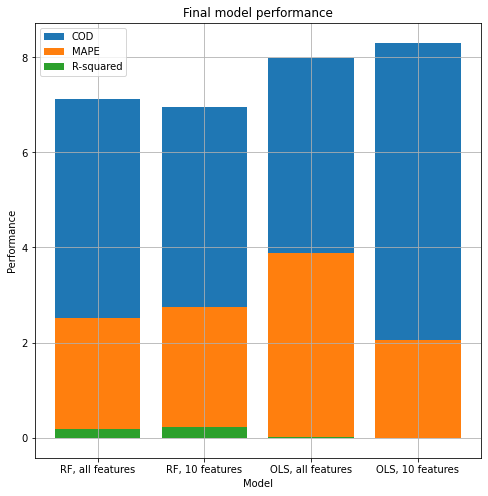

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in results.columns[::-1]:
    plt.bar(results.index, results[i], label=i)
plt.legend()
plt.xlabel('Model')
plt.ylabel('Performance')
plt.title('Final model performance')
plt.savefig('Models/model_performance.png')
plt.grid()
plt.show()

In [22]:
#hit rates
hit_rates = pd.DataFrame(index=['RF, all features', 'RF, 10 features', 'OLS, all features', 'OLS, 10 features'], 
                         columns=['Within 1%', 'Within 5%', 'Within 10%', 'Within 15%', 'Within 20%'])

def predict_hit_rate(col_to_use, margin):
    in_range = []
    res_tmp['low'] = res_tmp.y_test-(res_tmp.y_test*margin)
    res_tmp['high'] = res_tmp.y_test+(res_tmp.y_test*margin)
    place = 0
    for i in res_tmp[col_to_use]:
        if i > res_tmp['low'].iloc[place]:
            if i < res_tmp['high'].iloc[place]:
                in_range.append(1)
        place =+ 1
    a = len(in_range)
    b = len(res_tmp)
    c = a/b
    return c

hit_rates['Within 1%']['RF, all features'] = predict_hit_rate('for_1', 0.01)*100
hit_rates['Within 1%']['RF, 10 features'] = predict_hit_rate('for_2', 0.01)*100
hit_rates['Within 1%']['OLS, all features'] = predict_hit_rate('ols_1', 0.01)*100
hit_rates['Within 1%']['OLS, 10 features'] = predict_hit_rate('ols_2', 0.01)*100
hit_rates['Within 5%']['RF, all features'] = predict_hit_rate('for_1', 0.05)*100
hit_rates['Within 5%']['RF, 10 features'] = predict_hit_rate('for_2', 0.05)*100
hit_rates['Within 5%']['OLS, all features'] = predict_hit_rate('ols_1', 0.05)*100
hit_rates['Within 5%']['OLS, 10 features'] = predict_hit_rate('ols_2', 0.05)*100
hit_rates['Within 10%']['RF, all features'] = predict_hit_rate('for_1', 0.10)*100
hit_rates['Within 10%']['RF, 10 features'] = predict_hit_rate('for_2', 0.10)*100
hit_rates['Within 10%']['OLS, all features'] = predict_hit_rate('ols_1', 0.10)*100
hit_rates['Within 10%']['OLS, 10 features'] = predict_hit_rate('ols_2', 0.10)*100
hit_rates['Within 15%']['RF, all features'] = predict_hit_rate('for_1', 0.15)*100
hit_rates['Within 15%']['RF, 10 features'] = predict_hit_rate('for_2', 0.15)*100
hit_rates['Within 15%']['OLS, all features'] = predict_hit_rate('ols_1', 0.15)*100
hit_rates['Within 15%']['OLS, 10 features'] = predict_hit_rate('ols_2', 0.15)*100
hit_rates['Within 20%']['RF, all features'] = predict_hit_rate('for_1', 0.20)*100
hit_rates['Within 20%']['RF, 10 features'] = predict_hit_rate('for_2', 0.20)*100
hit_rates['Within 20%']['OLS, all features'] = predict_hit_rate('ols_1', 0.20)*100
hit_rates['Within 20%']['OLS, 10 features'] = predict_hit_rate('ols_2', 0.20)*100

hit_rates.astype(float).round(3)

,Within 1%,Within 5%,Within 10%,Within 15%,Within 20%
"RF, all features",12.022,57.963,69.671,95.043,97.948
"RF, 10 features",12.449,60.312,70.870,94.448,97.988
"OLS, all features",1.698,36.549,92.508,98.873,99.026
"OLS, 10 features",5.528,70.950,98.495,98.954,99.026


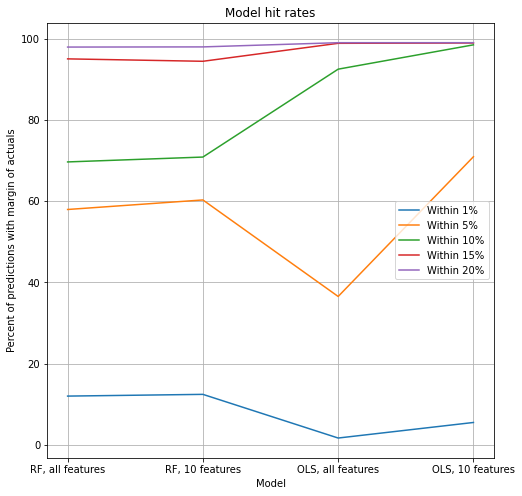

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in hit_rates.columns:
    plt.plot(hit_rates.index, hit_rates[i], label=i)
plt.legend()
plt.xlabel('Model')
plt.ylabel('Percent of predictions with margin of actuals')
plt.title('Model hit rates')
plt.savefig('Models/hit_rates.png')
plt.grid()
plt.show()

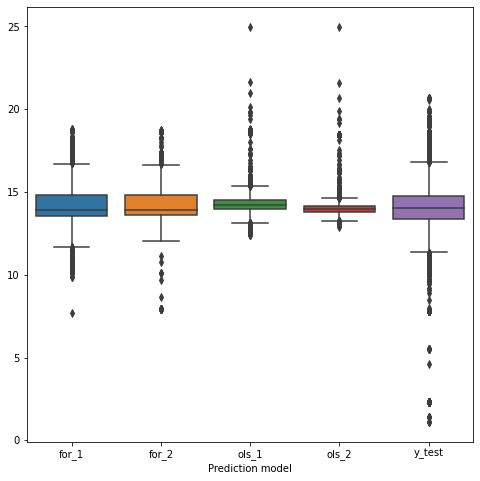

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.boxplot(data=res_tmp[['for_1', 'for_2', 'ols_1', 'ols_2', 'y_test']])
plt.xlabel('Prediction model')
plt.savefig('Models/boxplotofresults.png')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

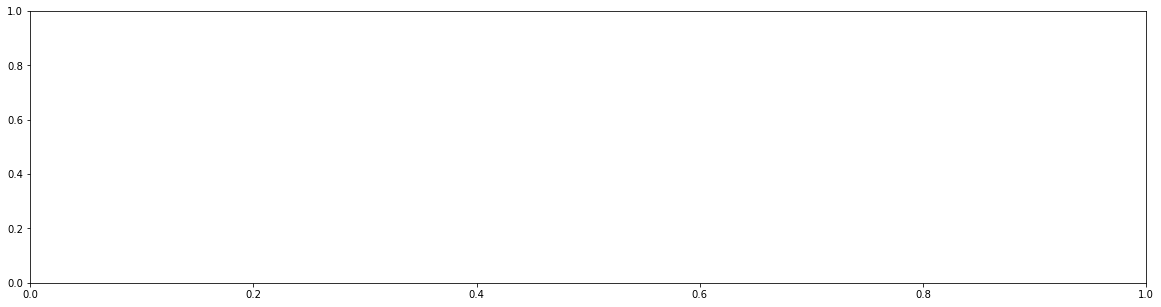

In [20]:
#OLS 1 COEFS
#plot figure
plt.figure(figsize=(20, 5))
plt.bar(ols_1_results.column, ols_1_results.coef)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Feature")
plt.ylabel('Coefficient size')
plt.title('Coefficient sizes, OLS with all features')
plt.savefig("Models/fullolscoefs.png")
plt.show()

In [ ]:
#plot figure
plt.figure(figsize=(20, 5))
plt.bar(ols_2_results.column, ols_2_results.coef)
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("Feature")
plt.ylabel('Coefficient size')
plt.title('Coefficient size, OLS with 10 top features as determined by RF')
plt.savefig("Models/subsetcoefs.png")
plt.show()

# SUNSET - Compare models

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(data=res_tmp, x='y_test', y='for_1', label='full_forest')
sns.regplot(data=res_tmp, x='y_test', y='for_2',label='sub_forest')
sns.regplot(data=res_tmp, x='y_test', y='ols_1',label='full_ols')
sns.regplot(data=res_tmp, x='y_test', y='ols_2',label='sub_ols')
plt.legend()
plt.show()

In [ ]:
results = pd.DataFrame()
results['Model'] = ['RF, all features', 'RF, 10 features', 'OLS, all features', 'OLS, 10 features']
results = results.set_index('Model')

from sklearn.metrics import mean_squared_error
import math

#RMSE AND %RMSE
results['RMSE'] = [math.sqrt(mean_squared_error(forest_1_predictions, y_test)), 
                  math.sqrt(mean_squared_error(forest_2_predictions, y_test)), 
                  math.sqrt(mean_squared_error(ols_1_predictions, y_test)), 
                  math.sqrt(mean_squared_error(ols_2_predictions, y_test))]

def percent_rmse(y_true, y_pred):
    rmspe = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
    return rmspe
results['%RMSE'] = [percent_rmse(y_test, forest_1_predictions),
                   percent_rmse(y_test, forest_2_predictions),
                   percent_rmse(y_test, ols_1_predictions),
                   percent_rmse(y_test, ols_2_predictions)]

#MAE AND MAPE
from sklearn.metrics import mean_absolute_error
results['MAE'] = [mean_absolute_error(y_test, forest_1_predictions).round(2), 
                  mean_absolute_error(y_test, forest_2_predictions), 
                  mean_absolute_error(y_test, ols_1_predictions), 
                  mean_absolute_error(y_test, ols_2_predictions)]

def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

results['%MAE'] = [MAPE(y_test, forest_1_predictions),
                   MAPE(y_test, forest_2_predictions),
                   MAPE(y_test, ols_1_predictions),
                   MAPE(y_test, ols_2_predictions)]

#R2 (COEFFICIENT OF DETERMINATION)
from sklearn.metrics import r2_score
results['R-squared'] = [r2_score(y_test, forest_1_predictions), 
                  r2_score(y_test, forest_2_predictions), 
                  r2_score(y_test, ols_1_predictions), 
                  r2_score(y_test, ols_2_predictions)]

results = results.round(3)
results

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in results.columns:
    plt.bar(results.index, results[i], label=i, alpha=0.2)
plt.legend()
plt.xlabel('Model')
plt.ylabel('Performance')
plt.title('Final model performance')
plt.savefig('Models/model_performance.png')
plt.grid()
plt.show()

In [ ]:
#hit rates
y_test_for_hit_rate = list(y_test)
hit_rates = pd.DataFrame(index=['RF, all features', 'RF, 10 features', 'OLS, all features', 'OLS, 10 features'], 
                         columns=['Within 1%', 'Within 5%', 'Within 10%'])
predictions = [forest_1_predictions, forest_2_predictions, ols_1_predictions, ols_2_predictions]
def predict_hit_rate(y_true, y_pred, margin):
    a = 0
    rate_tmp = []
    for i in y_pred:
        if i >= y_true.iloc[a]*(1-margin):
            if i >= y_true.iloc[a]*(1+margin):
                rate_tmp.append(1)
            else:
                pass
        else:
            rate_tmp.append(0)
        a += 1
    return(sum(rate_tmp) / len(rate_tmp))

hit_rates['Within 1%']['RF, all features'] = predict_hit_rate(y_test, forest_1_predictions, 0.01)*100
hit_rates['Within 1%']['RF, 20 features'] = predict_hit_rate(y_test, forest_2_predictions, 0.01)*100
hit_rates['Within 1%']['OLS, all features'] = predict_hit_rate(y_test, ols_1_predictions, 0.01)*100
hit_rates['Within 1%']['OLS, 20 features'] = predict_hit_rate(y_test, ols_2_predictions, 0.01)*100
hit_rates['Within 5%']['RF, all features'] = predict_hit_rate(y_test, forest_1_predictions, 0.05)*100
hit_rates['Within 5%']['RF, 20 features'] = predict_hit_rate(y_test, forest_2_predictions, 0.05)*100
hit_rates['Within 5%']['OLS, all features'] = predict_hit_rate(y_test, ols_1_predictions, 0.05)*100
hit_rates['Within 5%']['OLS, 20 features'] = predict_hit_rate(y_test, ols_2_predictions, 0.05)*100
hit_rates['Within 10%']['RF, all features'] = predict_hit_rate(y_test, forest_1_predictions, 0.10)*100
hit_rates['Within 10%']['RF, 20 features'] = predict_hit_rate(y_test, forest_2_predictions, 0.10)*100
hit_rates['Within 10%']['OLS, all features'] = predict_hit_rate(y_test, ols_1_predictions, 0.10)*100
hit_rates['Within 10%']['OLS, 20 features'] = predict_hit_rate(y_test, ols_2_predictions, 0.10)*100

hit_rates.astype(float).round(3)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in hit_rates.columns:
    plt.scatter(hit_rates.index, hit_rates[i], label=i)
plt.legend()
plt.xlabel('Model')
plt.ylabel('Percent of predictions with margin of actuals')
plt.title('Model hit rates')
plt.savefig('Models/hit_rates.png')
plt.grid()
plt.show()